<a href="https://colab.research.google.com/github/dipayandas97/Deep-Learning-Notebooks/blob/master/Lung_segmentation_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Preprocess

In [34]:
from skimage import transform, io, img_as_float, exposure

"""
Data was preprocessed in the following ways:
    - resize to im_shape;
    - equalize histogram (skimage.exposure.equalize_hist);
    - normalize by data set mean and std.
Resulting shape should be (n_samples, img_width, img_height, 1).
Dataframe should contain paths to images and masks as two columns (relative to `path`).
"""

def preprocess_data_to_train(df, path, im_shape):
    X, y = [], []
    for i, item in df.iterrows():
        print('File:',i)
        img = img_as_float(io.imread(path + item[0]))
        img = transform.resize(img, im_shape)
        img = exposure.equalize_hist(img)
        img = np.expand_dims(img, -1)

        mask = io.imread(path + item[1])
        mask = transform.resize(mask, im_shape)
        mask = np.expand_dims(mask, -1)
        X.append(img)
        y.append(mask)
        
    X = np.array(X)
    y = np.array(y)
    X -= X.mean()
    X /= X.std()
    
    return X, y

In [58]:
from skimage import transform, io, img_as_float, exposure

def preprocess_data_to_infer(df, path, im_shape):
    X = []
    for i, item in df.iterrows():
        print('File:',i)
        img = img_as_float(io.imread(path + item[0]))
        img = transform.resize(img, im_shape)
        img = exposure.equalize_hist(img)
        img = np.expand_dims(img, -1)
        X.append(img)
        
    X = np.array(X)
    X -= X.mean()
    X /= X.std()
    
    return X

In [27]:
path = '/content/drive/My Drive/ISI/chest_xray_tb/input/Normal/'
image_names = ['input_images/'+x for x in os.listdir(path+'input_images/')]
mask_names = ['n_segments/'+x[x.index('/')+1:x.index('.')]+'_MASK.png' for x in image_names]

df = []
for img in image_names:
    for m in mask_names:
        if img[img.index('/')+1:img.index('.')] in m:
            df.append((img, m))

print(len(df))

df = pd.DataFrame(df)
df.head()

326


,0,1
0,input_images/0_case00167.png,n_segments/0_case00167_MASK.png
1,input_images/0_case00227.png,n_segments/0_case00227_MASK.png
2,input_images/0-caes00095.png,n_segments/0-caes00095_MASK.png
3,input_images/0_case00271.png,n_segments/0_case00271_MASK.png
4,input_images/0_case00304.png,n_segments/0_case00304_MASK.png


In [33]:
X, y = preprocess_data_to_train(df, path, im_shape=(256,256))
print(X.shape, y.shape)

(326, 256, 256, 1) (326, 256, 256, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


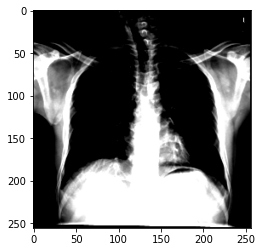

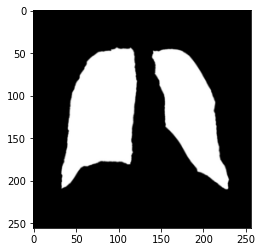

In [41]:
d = 300
plt.imshow(np.dstack((X[d], X[d], X[d])))
plt.show()
plt.imshow(np.dstack((y[d], y[d], y[d])))

In [43]:
import pickle 
f = open('/content/drive/My Drive/ISI/'+'SH(normal)_preprocessed_X_(for_lung_seg_2d).pkl', 'wb')
pickle.dump(X, f)
f.close()

f = open('/content/drive/My Drive/ISI/'+'SH(normal)_preprocessed_y_(for_lung_seg_2d).pkl', 'wb')
pickle.dump(y, f)
f.close()

#Model


In [5]:
from keras.models import load_model

saved_model_path = '/content/drive/My Drive/ISI/trained_model.hdf5'
model = load_model(saved_model_path)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


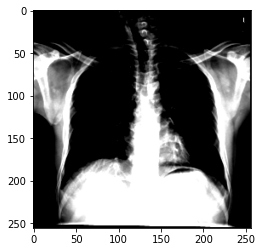

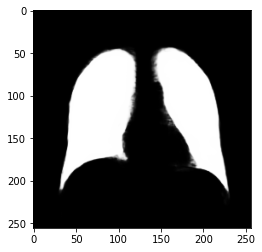

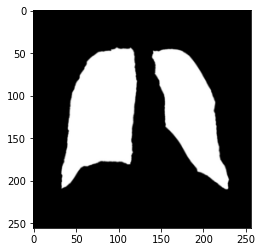

In [53]:
d = 300

pred = model.predict(X[d:d+1])

plt.imshow(np.dstack((X[d],X[d],X[d])))
plt.show()
plt.imshow(np.dstack((pred[0],pred[0],pred[0])))
plt.show()
plt.imshow(np.dstack((y[d],y[d],y[d])))